Importando bibliotecas necessárias para o desenvolvimento

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import openai
from keys import openai_key


Gerando uma função para consumir a API da IA Generativa OpenAI

In [3]:
openai.api_key = openai_key
headers = {'Authorization': f'Bearer {openai_key}', 'Content-Type': 'application/json'}
link = 'https://api.openai.com/v1/chat/completions'
id_model = 'gpt-4o'

def get_ai_response(prompt):
    body_message = {
        'model': id_model,
        'messages': [{'role': 'user', 'content': prompt}]
    }

    response_ai = requests.post(link, headers=headers, json=body_message)
    return response_ai.json()

Criando o DataFrame a partir do csv 'df_asteroids' gerado no 'data_extraction'

In [4]:
df_asteroids = pd.read_csv('../data/df_asteroids.csv', index_col= 0)

Visualizando as primeiras linhas

In [5]:
df_asteroids.head()

,name,close_approach_date,miss_distance_km,relative_velocity_kmh,is_potentially_hazardous,absolute_magnitude_h,estimated_diameter_min,estimated_diameter_max,is_sentry_object
0,16657 (1993 UB),2024-10-27,5.921104e+07,57205.665720,False,16.55,1301.832102,2910.985075,False
1,189700 (2001 TA45),2024-10-27,5.685544e+07,21992.037485,False,19.18,387.752830,867.041687,False
2,(2016 BF1),2024-10-27,3.965309e+06,33240.405089,False,25.40,22.108281,49.435619,False
3,(2017 HG1),2024-10-27,6.427133e+07,56681.806729,False,27.50,8.405334,18.794898,False
4,(2018 HA1),2024-10-27,8.580750e+06,87039.972760,False,22.10,101.054342,225.964377,False


Criando o diametro estimado médio para cada asteroide

In [6]:
df_asteroids['estimated_diameter_mean'] = (df_asteroids['estimated_diameter_max'] + df_asteroids['estimated_diameter_min']) / 2

In [7]:
df_asteroids

,name,close_approach_date,miss_distance_km,relative_velocity_kmh,is_potentially_hazardous,absolute_magnitude_h,estimated_diameter_min,estimated_diameter_max,is_sentry_object,estimated_diameter_mean
0,16657 (1993 UB),2024-10-27,5.921104e+07,57205.665720,False,16.55,1301.832102,2910.985075,False,2106.408588
1,189700 (2001 TA45),2024-10-27,5.685544e+07,21992.037485,False,19.18,387.752830,867.041687,False,627.397259
2,(2016 BF1),2024-10-27,3.965309e+06,33240.405089,False,25.40,22.108281,49.435619,False,35.771950
3,(2017 HG1),2024-10-27,6.427133e+07,56681.806729,False,27.50,8.405334,18.794898,False,13.600116
4,(2018 HA1),2024-10-27,8.580750e+06,87039.972760,False,22.10,101.054342,225.964377,False,163.509359
...,...,...,...,...,...,...,...,...,...,...
7255,(2023 VW2),2023-10-29,8.611353e+06,37563.121389,False,24.34,36.020935,80.545258,False,58.283096
7256,(2023 VW3),2023-10-29,1.262504e+07,21142.587711,False,25.29,23.257069,52.004387,False,37.630728
7257,(2023 VD8),2023-10-29,8.186460e+06,63669.486428,False,23.40,55.533491,124.176661,False,89.855076
7258,(2023 VE8),2023-10-29,4.719325e+06,29962.335315,False,25.15,24.805899,55.467677,False,40.136788


Visualizando informações sobre o DataFrame, como o tipo de dado de cada coluna

In [8]:
df_asteroids.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7260 entries, 0 to 7259
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      7260 non-null   object 
 1   close_approach_date       7260 non-null   object 
 2   miss_distance_km          7260 non-null   float64
 3   relative_velocity_kmh     7260 non-null   float64
 4   is_potentially_hazardous  7260 non-null   bool   
 5   absolute_magnitude_h      7260 non-null   float64
 6   estimated_diameter_min    7260 non-null   float64
 7   estimated_diameter_max    7260 non-null   float64
 8   is_sentry_object          7260 non-null   bool   
 9   estimated_diameter_mean   7260 non-null   float64
dtypes: bool(2), float64(6), object(2)
memory usage: 524.6+ KB


Ajustando o tipo de dados para as colunas necessárias

In [9]:
df_asteroids['close_approach_date'] = pd.to_datetime(df_asteroids['close_approach_date'])

df_asteroids['miss_distance_km'] = df_asteroids['miss_distance_km'].astype('float64')

df_asteroids['relative_velocity_kmh'] = df_asteroids['relative_velocity_kmh'].astype('float64')

Salvando novo csv com as alterações feitas em st1

In [10]:
df_asteroids.to_csv('../data/df_asteroids_st2.csv')

Descrição estatítisca dos dados das colunas de data e numéricas

In [237]:
df_asteroids.describe()

,close_approach_date,miss_distance_km,relative_velocity_kmh,absolute_magnitude_h,estimated_diameter_min,estimated_diameter_max,estimated_diameter_mean
count,7260,7.260000e+03,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000
mean,2024-04-27 01:41:21.322313984,3.207131e+07,45769.407758,24.106960,99.830313,223.227367,161.528840
min,2023-10-24 00:00:00,8.098256e+03,1418.218469,9.200000,0.888290,1.986278,1.437284
25%,2024-01-19 00:00:00,9.311649e+06,27566.370619,22.197500,16.016034,35.812940,25.914487
50%,2024-04-22 00:00:00,3.023245e+07,41464.722224,24.390000,35.200998,78.711824,56.956411
75%,2024-08-13 00:00:00,5.225586e+07,60077.464613,26.100000,96.617510,216.043320,156.330415
max,2024-10-28 00:00:00,7.479169e+07,161520.897925,32.380000,38419.789106,85909.260123,62164.524615
std,NaN,2.319744e+07,24263.289537,2.744343,494.616717,1105.996601,800.306659


### Primeira Análise - Número de Asteróides que passaram próximo da Terra
Importante para ver a distribuição de asteroides durante os meses

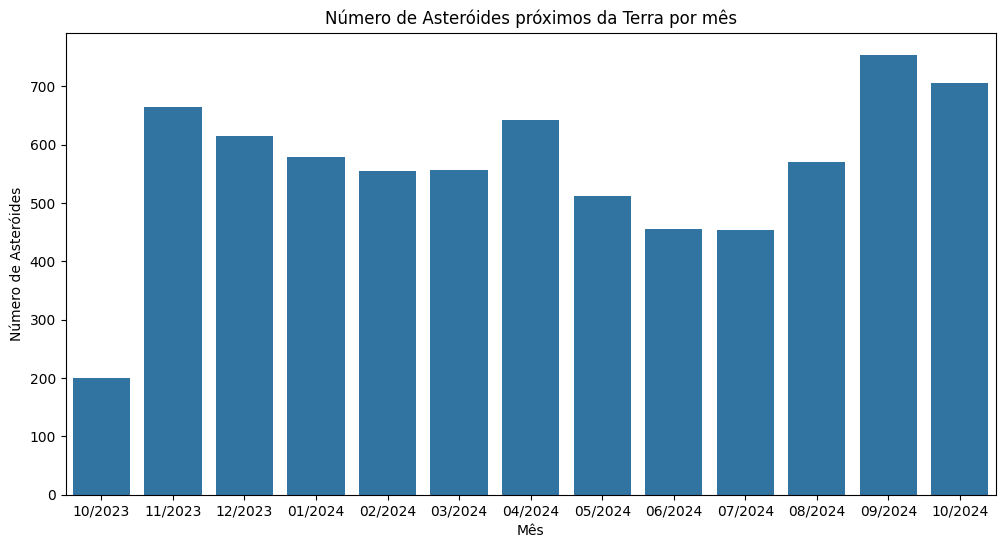

Resposta da IA Generativa:

Os dados fornecidos mostram uma variação no número de asteroides próximos da Terra ao longo de um período de um ano, de outubro de 2023 a outubro de 2024. Há algumas observações e possíveis interpretações que podem ser feitas sobre essa atividade:

1. **Flutuações Mensais:** O número de asteroides próximos parece flutuar de mês para mês, sem um padrão aparente de crescimento ou redução contínua. Isso poderia indicar variações naturais na trajetória e detecção dos asteroides, possivelmente influenciadas por fatores como a posição da Terra em sua órbita ou eventos astronômicos específicos.

2. **Pico e Queda:** Nota-se um aumento significativo no número de asteroides em setembro de 2024 (754) e outubro de 2024 (705) em comparação com os meses anteriores, o que pode sugerir um incremento na atividade ou na capacidade de detecção durante esses meses. Fatores sazonais ou melhorias nos métodos de monitoramento podem ser responsáveis por isso.

3. **Possíveis Melho

In [27]:
# Converter para períodos mensais
asteroids_per_month = df_asteroids['close_approach_date'].dt.to_period('M').value_counts().sort_index()

# Converter o índice para o formato 'Ano-Mês'
asteroids_per_month.index = asteroids_per_month.index.strftime('%m/%Y')

plt.figure(figsize=(12,6))
sns.barplot(x=asteroids_per_month.index, y=asteroids_per_month.values)
plt.title('Número de Asteróides próximos da Terra por mês')
plt.xlabel('Mês')
plt.ylabel('Número de Asteróides')
plt.savefig('../images/numero_asteroides_por_mes.png')
plt.show()


prompt = f"Os dados a seguir mostram o número de asteroides próximos da Terra por dia: {asteroids_per_month.to_dict()}. Comente sobre o que esses dados podem indicar sobre a atividade de asteroides."
response_ai = get_ai_response(prompt)

print('Resposta da IA Generativa:\n')
print(response_ai['choices'][0]['message']['content'])

### Segunda Análise - Média de distância mínima da Terra por mês

Importante para poder visualizar possíveis momentos do ano que tivemos uma menor distância média dos asteroides da Terra

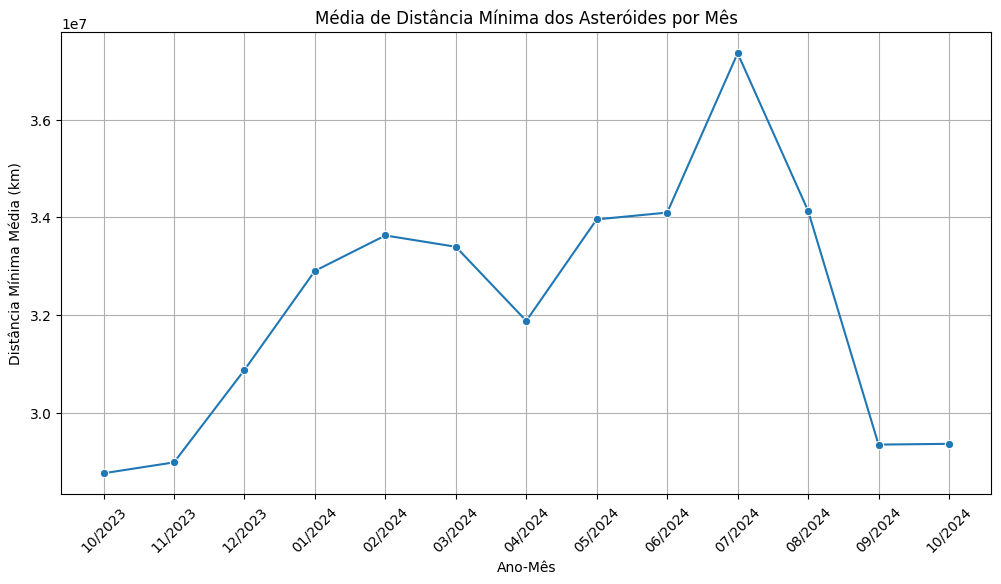

Resposta da IA Generativa:

A análise dos dados fornecidos sobre a distância mínima nos últimos 12 meses revela algumas tendências e padrões interessantes. Vamos examinar os principais pontos:

1. **Tendência Geral**: Observa-se um aumento geral na distância mínima ao longo do período de 12 meses. Em outubro de 2023, a distância registrada foi de aproximadamente 28,76 milhões de km, enquanto em setembro de 2024, essa distância havia aumentado para aproximadamente 29,34 milhões de km.

2. **Picos e Variações**: Há flutuações significativas nos dados. Por exemplo, o maior pico de distância mínima ocorre em julho de 2024, com aproximadamente 37,36 milhões de km, o que representa um aumento notável em relação aos meses anteriores.

3. **Queda Abrupta**: Após atingir esse pico em julho de 2024, observamos uma queda considerável na distância mínima em agosto de 2024 para cerca de 34,13 milhões de km, e continua a diminuir até setembro de 2024.

4. **Média do Período**: Para calcular a média 

In [28]:
# criando uma nova coluna com mês-ano
df_asteroids['year_month'] = df_asteroids['close_approach_date'].dt.to_period('M')

# criando uma média de distância mínima agrupado por mês-ano
mean_distance_per_month = df_asteroids.groupby('year_month')['miss_distance_km'].mean().reset_index()

# Alterando a string da data
mean_distance_per_month['year_month'] = mean_distance_per_month['year_month'].dt.strftime('%m/%Y')

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_distance_per_month, x='year_month', y='miss_distance_km', marker='o')
plt.title('Média de Distância Mínima dos Asteróides por Mês')
plt.xlabel('Ano-Mês')
plt.ylabel('Distância Mínima Média (km)')
plt.xticks(rotation=45)  
plt.grid()
plt.savefig('../images/media_distanciamin_mes.png')
plt.show()

prompt = f"Comente sobre a média de distância mínima nos ultimos 12 meses {mean_distance_per_month.to_dict()}"
response_ai = get_ai_response(prompt)

print('Resposta da IA Generativa:\n')
print(response_ai['choices'][0]['message']['content'])

### Terceira Análise - Proporção de ateroides perigosos/não perigosos á Terra
Importante para ver a proporção de asteroides que trazem algum perigo à Terra, para as entidades possam tomar algum tipo de prevenção contra os perigosos

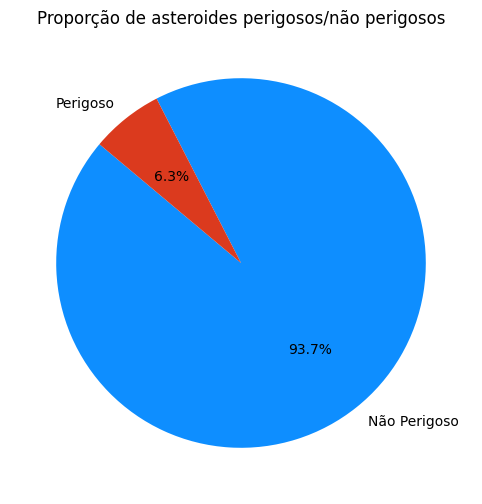

Resposta da IA Generativa:

Os dados apresentados indicam a quantidade de asteroides classificados como "perigosos" e "não perigosos". Do total, 6800 asteroides foram considerados não perigosos, enquanto 460 foram classificados como perigosos. Para entender melhor esses números, podemos calcular a proporção de cada categoria em relação ao total de asteroides.

O total de asteroides é 6800 + 460 = 7260.

- Proporção de asteroides não perigosos: \( \frac{6800}{7260} \approx 0.936 \) ou 93.6%.
- Proporção de asteroides perigosos: \( \frac{460}{7260} \approx 0.063 \) ou 6.3%.

Esses números sugerem que a grande maioria dos asteroides observados, cerca de 93.6%, não apresentam perigo significativo, enquanto uma menor, mas ainda relevante, fração de 6.3% é considerada perigosa. Esses dados são importantes para direcionar os esforços de monitoramento e mitigação de riscos astronômicos, ajudando a priorizar quais asteroides devem ser acompanhados mais de perto e quais estratégias podem ser des

In [29]:
plt.figure(figsize=(12, 6))
hazardous_count = df_asteroids['is_potentially_hazardous'].value_counts()
plt.pie(hazardous_count, labels=['Não Perigoso', 'Perigoso'], autopct='%1.1f%%', startangle=140, colors=['#0E8EFF', '#DB3A1E'])
plt.title('Proporção de asteroides perigosos/não perigosos')
plt.savefig('../images/prop_perigosos_ou_nao.png')
plt.show()

prompt = f"Os dados a seguir mostram a proporção de asteroides perigosos e não perigosos: {hazardous_count.to_dict()}. Comente sobre."
response_ai = get_ai_response(prompt)

print('Resposta da IA Generativa:\n')
print(response_ai['choices'][0]['message']['content'])

A partir de agora a amostragem utilizada foi semanal para facilitar a análise e podermos utilizar a IA Genrativa para complementar a análise nesses casos

In [31]:
# Calcular a data limite para os últimos 7 dias
last_week = datetime.now() - timedelta(days=7)

# Filtrar o DataFrame para incluir apenas os asteroides dos últimos 7 dias
df_last_7_days = df_asteroids[df_asteroids['close_approach_date'] >= last_week]

### Quarta Análise - Visualizando correlação entre Menor distância e diâmetro máximo estimado
Importante para visualizar qual é o diâmetro dos asteroides que passam mais perto da Terra
Assim, temos uma noção de quanto estrago o asteroide poderia gerar se chegasse até a Terra
- Nesse caso há um certo padrão nessa distribuição, os asteroides estão mais agrupados no canto inferior esquerdo,  
denotando que os asteroides que chegam mais próximos à Terra geralmente são menores

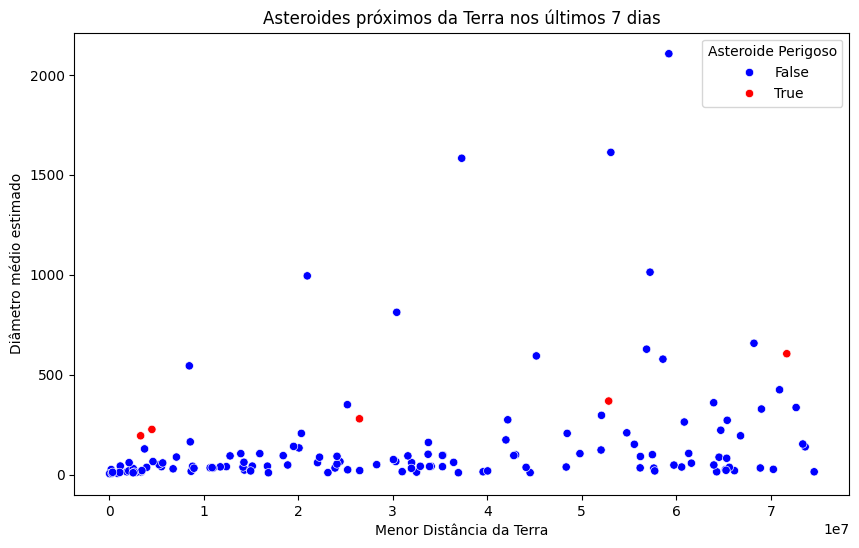

Resposta da IA Generativa:

Os dados fornecidos sugerem duas séries de medidas relacionadas aos asteroides: uma informa os diâmetros médios estimados (em, presumivelmente, metros) de diversos asteroides e a outra indica a distância mínima estimada (novamente, presumivelmente em metros ou alguma outra unidade padrão) de cada asteroide à Terra.

Aqui estão algumas observações e considerações sobre os dados:

1. **Diâmetro dos Asteroides**: Os diâmetros parecem variar bastante, desde valores muito pequenos até alguns em torno de 2100 metros (ou outra unidade). Isso indica uma diversidade significativa no tamanho dos asteroides próximos à Terra.

2. **Distância dos Asteroides à Terra**: As distâncias mínimas também variam consideravelmente, mas todos os valores são relativamente grandes, o que é uma boa notícia, pois indica que esses asteroides, por enquanto, não representam uma ameaça iminente de colisão com a Terra.

3. **Correlação Tamanho-Distância**: Poderia ser interessante analisar 

In [32]:
# Plotar o gráfico de dispersão apenas para os últimos 7 dias
plt.figure(figsize=(10, 6))
sns.scatterplot(x='miss_distance_km', y='estimated_diameter_mean', hue='is_potentially_hazardous', 
                data=df_last_7_days, palette={True: 'red', False: 'blue'})
plt.xlabel('Menor Distância da Terra')
plt.ylabel('Diâmetro médio estimado')
plt.legend(title='Asteroide Perigoso')
plt.title('Asteroides próximos da Terra nos últimos 7 dias')
plt.savefig('../images/corr_distancia_diametro.png')
plt.show()

prompt = f"""
O que você pode comentar sobre {df_last_7_days['estimated_diameter_mean'].to_dict()} e {df_last_7_days['miss_distance_km'].to_dict()} dado que sao valores de diametros medios estimados de um asteroide e a minima distancia de um asteroiude da Terra, respectivamente.
"""

response_ai = get_ai_response(prompt)

print('Resposta da IA Generativa:\n')
print(response_ai['choices'][0]['message']['content'])

### Quinta Análise - Visualizando a distribuição de diametro médio dos asteroides
Importante para observarmos o tamanho dos asteroides que passam perto da Terra, pois assim podemos ter uma noção de estrago que poderiam causar.

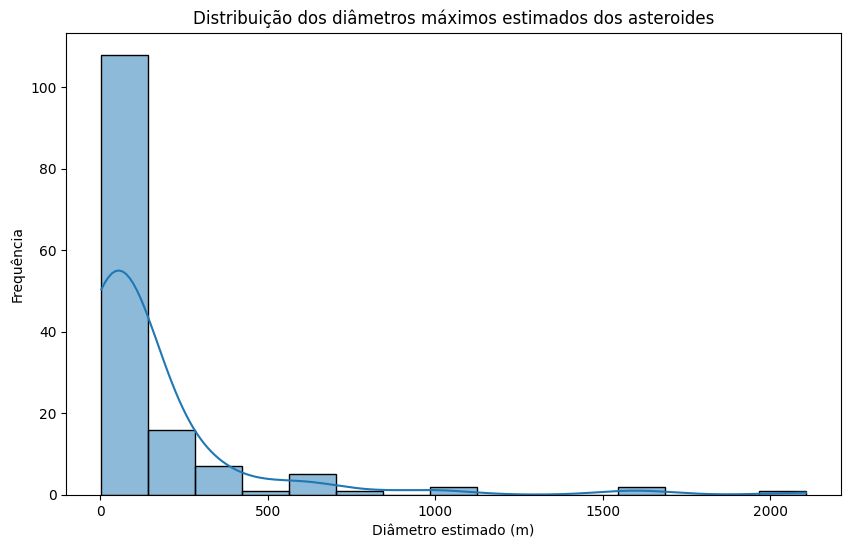

Resposta da IA Generativa:

Para comentar sobre a média e distribuição das estimativas dos asteroides fornecidas, primeiro devemos calcular a média. Para calcular a média, somamos todos os valores e dividimos pelo número de entradas.

Existem 143 entradas na lista fornecida. Aqui está a soma de todos os valores:

\[ \text{soma} = 2106.41 + 627.40 + 35.77 + 13.60 + 163.51 + 13.60 + \ldots + 31.57 + 140.72 \]

Depois dividimos a soma pelo número total de valores (143) para encontrar a média.

Além da média, podemos tentar compreender a distribuição dos dados. Observando os valores fornecidos, podemos notar os seguintes pontos:

1. **Variação Grande nos Valores**: Existem certos valores que são significativamente maiores que outros (como 2106.41, 1612.66, 994.36, etc.), indicando a presença de possíveis outliers. 

2. **Skewed Distribution**: A presença de valores muito maiores que o resto pode indicar que a distribuição pode não ser simétrica, sendo possivelmente uma cauda longa positiva

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df_last_7_days['estimated_diameter_mean'], kde=True, bins=15)
plt.title('Distribuição dos diâmetros máximos estimados dos asteroides')
plt.xlabel('Diâmetro estimado (m)')
plt.ylabel('Frequência')
plt.savefig('../images/distribuicao_diametro.png')
plt.show()

prompt = f"""
O que você pode comentar sobre a média das etimativas dos asteroides: {df_last_7_days['estimated_diameter_mean'].to_dict()}. Comente sobre sua distribuição.
"""

response_ai = get_ai_response(prompt)

print('Resposta da IA Generativa:\n')
print(response_ai['choices'][0]['message']['content'])

### Sexta Análise - Vendo a distribuição das velocidades
Visualizando a distribuição de velocidade dos asteroides

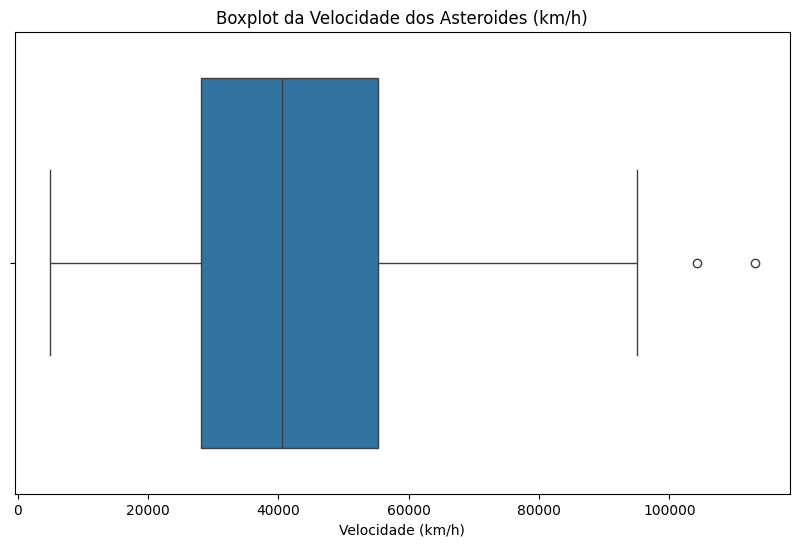

Resposta da IA Generativa:

O conjunto de velocidades dos asteroides que você forneceu varia bastante, indo desde valores tão baixos quanto 4.966,978 km/h até valores tão altos quanto 113.072,731 km/h. 

Algumas observações podem ser feitas com base nesses dados:

1. **Variedade de Velocidades**: A grande variação nas velocidades sugere que esses asteroides poderão ter diferentes tamanhos, composições, ou trajetórias próximas a corpos celestes que podem influenciar suas velocidades.

2. **Velocidade Média**: Para determinar a velocidade média desses asteroides, seria necessário calcular a média aritmética de todas as velocidades listadas. Isso poderia dar uma ideia central sobre a mobilidade típica no espaço dessas rochas.

3. **Extremos Notáveis**: Dois valores se destacam, um na parte superior do espectro (113.072,731 km/h) e outro na parte inferior (4.966,978 km/h), sugerindo que há condições extremas que afetam o movimento de alguns asteroides em comparação com a maioria.

4. **Ast

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='relative_velocity_kmh', data=df_last_7_days)
plt.title('Boxplot da Velocidade dos Asteroides (km/h)')
plt.xlabel('Velocidade (km/h)')
plt.savefig('../images/distribuicao_velocidade.png')
plt.show()


prompt = f"""
O que você pode comentar sobre a velocidade dos asteroides: {df_last_7_days['relative_velocity_kmh'].to_dict()}.
"""

response_ai = get_ai_response(prompt)

print('Resposta da IA Generativa:\n')
print(response_ai['choices'][0]['message']['content'])